In [1]:
import os, sys, random

THIS_DIR = os.path.dirname(os.path.abspath("__file__"))
PARENT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
sys.path.append(PARENT_DIR)

import numpy as np
from scipy.io import loadmat
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


font = {'size'   : 18}

matplotlib.rc('font', **font)

In [2]:
path = './../Results/Pendulum/'

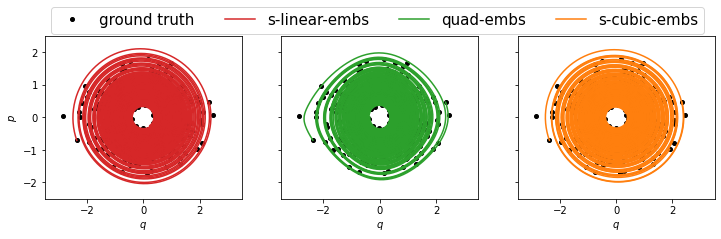

In [3]:
font = {'size'   : 18}

matplotlib.rc('font', **font)

prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

ground_truth_sol = loadmat(path + 'linear/' + 'sol_trajectories.mat' )['ground_truth_sol']
linear_sol = loadmat(path + 'linear/' + 'sol_trajectories.mat' )['learned_sol']
quad_sol = loadmat(path + 'quad/' + 'sol_trajectories.mat' )['learned_sol']
cubic_sol = loadmat(path + 'quad_opinf/' + 'sol_trajectories.mat' )['learned_sol']

MARKERSIZE = 50

fig, ax = plt.subplots(1, 3, figsize=(12,3), sharey=True)
for i in range(0, 1):
    ax[0].plot(
        ground_truth_sol[0, :, i].reshape(-1, 1),
        ground_truth_sol[1, :, i].reshape(-1, 1),
        "o",
        markersize=4,
        markevery=MARKERSIZE,
        color="k",
        label="ground truth",
    )
for j in range(3):
    for i in range(0, 10,1):
        ax[j].plot(
            ground_truth_sol[0, :, i].reshape(-1, 1),
            ground_truth_sol[1, :, i].reshape(-1, 1),
            "o",
            markersize=4,
            markevery=MARKERSIZE,
            color="k",
        )
    
for i in range(0, 1):
    ax[0].plot(
        linear_sol[0, :, i].reshape(-1, 1),
        linear_sol[1, :, i].reshape(-1, 1),
        color=colors[3],
        label='s-linear-embs',
    )
    
    ax[1].plot(
        quad_sol[0, :, i].reshape(-1, 1),
        quad_sol[1, :, i].reshape(-1, 1),
        color=colors[2],
        label='quad-embs',
    )
    
    ax[2].plot(
        cubic_sol[0, :, i].reshape(-1, 1),
        cubic_sol[1, :, i].reshape(-1, 1),
        color=colors[1],
        label='s-cubic-embs',
    )
    
for i in range(0, 10, 1):
    ax[0].plot(
        linear_sol[0, :, i].reshape(-1, 1),
        linear_sol[1, :, i].reshape(-1, 1),
        color=colors[3],
    )
    
    ax[1].plot(
        quad_sol[0, :, i].reshape(-1, 1),
        quad_sol[1, :, i].reshape(-1, 1),
        color=colors[2],
    )
    
    ax[2].plot(
        cubic_sol[0, :, i].reshape(-1, 1),
        cubic_sol[1, :, i].reshape(-1, 1),
        color=colors[1],
    )
    
    
    plt.ylim(-2.5,2.5)
    ax[0].set_xlim(-3.5,3.5)
    ax[1].set_xlim(-3.5,3.5)
    ax[2].set_xlim(-3.5,3.5)
    ax[0].set(ylabel = '$p$', xlabel = '$q$')
    
    ax[1].set( xlabel = '$q$')
    ax[2].set( xlabel = '$q$')
    
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,loc = "upper center", ncol = 4, fontsize=15, bbox_to_anchor=(0.51, 1.05))

plt.savefig(path + f'phase_plot.png', dpi=300, transparent=False,  bbox_inches="tight", pad_inches=.2)
plt.savefig(path + f'phase_plot.pdf', transparent=False, bbox_inches="tight", pad_inches=.2)

In [4]:
Err_linear = loadmat(path + 'linear/' + 'sol_trajectories.mat' )['err']
Err_quad   = loadmat(path + 'quad/' + 'sol_trajectories.mat' )['err']
Err_quad_opinf  = loadmat(path + 'quad_opinf/' + 'sol_trajectories.mat' )['err']

In [5]:
Err_quad_opinf.shape

(100, 2, 2000)

In [6]:
err_linear = [(np.sqrt((e**2).sum())) for e in Err_linear]
err_quad   = [(np.sqrt((e**2).sum())) for e in Err_quad]
err_quad_opinf  = [(np.sqrt((e**2).sum())) for e in Err_quad_opinf]

fun = lambda x: np.log10((np.median(x**2)))
# fun = lambda x: ((np.median(x**2)))

err_linear = [fun(e) for e in Err_linear]
err_quad   = [fun(e) for e in Err_quad]
err_quad_opinf  = [fun(e) for e in Err_quad_opinf]

In [7]:
np.argmax(err_quad), np.argmin(err_quad)#,err_quad

(69, 94)

In [8]:
_, sort_idx = np.unique(np.array(err_quad).flatten(),-1)
sort_idx[-4:][::-1]

array([69, 11, 15, 81])

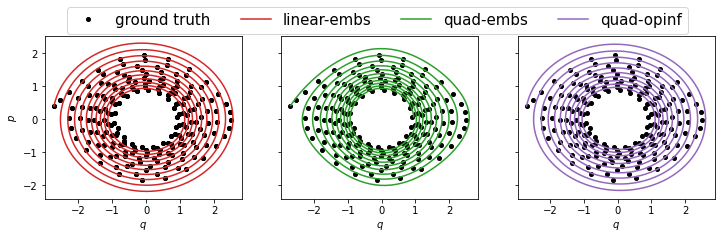

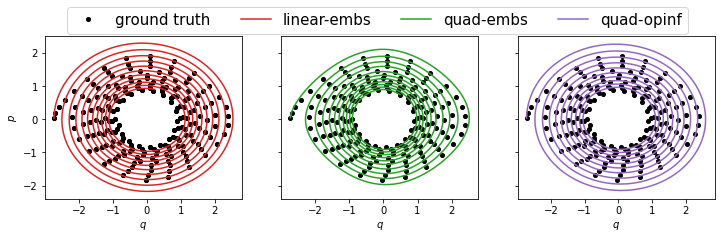

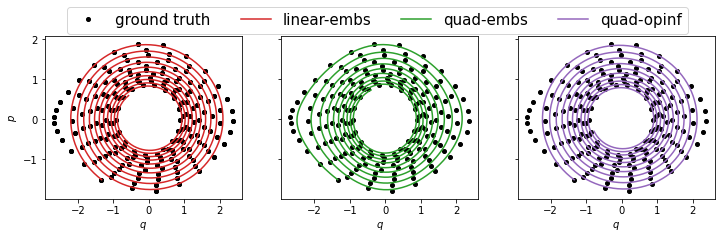

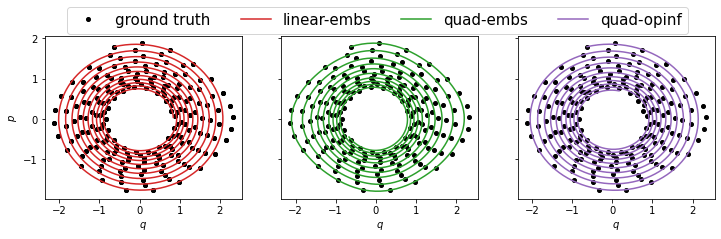

In [9]:
MARKER_EVERY= 10
MARKER_SIZE = 4

idxs = sort_idx[-4:][::-1]

for i in  idxs:
    fig, ax = plt.subplots(1, 3, figsize=(12,3), sharey=True)
    ax[0].plot(
        ground_truth_sol[0, :, i].reshape(-1, 1),
        ground_truth_sol[1, :, i].reshape(-1, 1),
        "o",
        markersize=MARKER_SIZE,
        markevery=MARKER_EVERY,
        color="k",
        label="ground truth",
    )
    
    for j in range(3):
            ax[j].plot(
                ground_truth_sol[0, :, i].reshape(-1, 1),
                ground_truth_sol[1, :, i].reshape(-1, 1),
                "o",
                markersize=MARKER_SIZE,
                markevery=MARKER_EVERY,
                color="k",
            )
    
    ax[0].plot(
        linear_sol[0, :, i].reshape(-1, 1),
        linear_sol[1, :, i].reshape(-1, 1),
        color=colors[3],
        label='linear-embs',
    )
    
    ax[1].plot(
        quad_sol[0, :, i].reshape(-1, 1),
        quad_sol[1, :, i].reshape(-1, 1),
        color=colors[2],
        label='quad-embs',
    )
    
    ax[2].plot(
        cubic_sol[0, :, i].reshape(-1, 1),
        cubic_sol[1, :, i].reshape(-1, 1),
        color=colors[4],
        label='quad-opinf',
    )
    
#     plt.ylim(-2.5,2.5)
#     ax[0].set_xlim(-3.5,3.5)
#     ax[1].set_xlim(-3.5,3.5)
#     ax[2].set_xlim(-3.5,3.5)
    ax[0].set(ylabel = '$p$', xlabel = '$q$')
    
    ax[1].set( xlabel = '$q$')
    ax[2].set( xlabel = '$q$')
    
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(lines, labels,loc = "upper center", ncol = 4, fontsize=15, bbox_to_anchor=(0.51, 1.05))

    plt.savefig(path + f'phase_plot_{i}.png', dpi=300, transparent=False,  bbox_inches="tight", pad_inches=.2)
    plt.savefig(path + f'phase_plot_{i}.pdf', transparent=False, bbox_inches="tight", pad_inches=.2)

In [10]:
print(f'mean:   {[np.mean(err_linear), np.mean(err_quad), np.mean(err_quad_opinf)]}')
print(f'median: {[np.median(err_linear), np.median(err_quad), np.median(err_quad_opinf)]}')
print(f'max:    {[np.max(err_linear), np.max(err_quad), np.max(err_quad_opinf)]}')
print(f'min:    {[np.min(err_linear), np.min(err_quad), np.min(err_quad_opinf)]}')

mean:   [-0.6165266745933073, -1.9512594152170015, -0.60841288718513]
median: [-0.6631035503921379, -1.8035988152003406, -0.6727352256042054]
max:    [0.45541440229382085, -0.11090662167829111, 0.4472162216882428]
min:    [-4.189830531849494, -5.060920899047426, -4.2860943319615]


In [11]:
Errors = {}
Errors['type'] = ['linear-embs']*100 + ['quad-embs']*100 + ['quad-opinf']*100
Errors['value'] = err_linear.copy()
print(len(Errors['value']), len(err_linear))
Errors['value'].extend(err_quad)
Errors['value'].extend(err_quad_opinf)
len(Errors['value'])

100 100


300

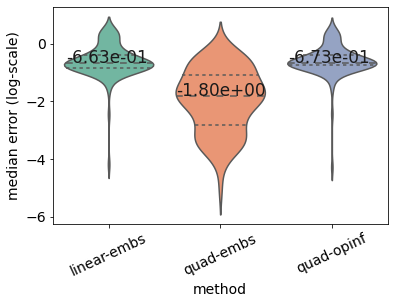

In [12]:
font = {'size'   : 14}

matplotlib.rc('font', **font)

ax = sns.violinplot(x ="type", y ="value", data = Errors, palette="Set2", split=True, scale="count", inner="quartile")

for l in ax.lines[1::3]:
    ax.text(l.get_data()[0][l.get_data()[0].nonzero()][0], l.get_data()[1][0], f'{l.get_data()[1][0]:.2e}',
            size='large', color = 'k')  

sns.set(font_scale = 1.7)
ax.set_ylabel('median error (log-scale)')
ax.set_xlabel('method')
plt.xticks(rotation=25, ha='center')

plt.savefig(path + f'error_analysis.png', dpi=300, transparent=False,  bbox_inches="tight", pad_inches=.2)
plt.savefig(path + f'error_analysis.pdf', transparent=False, bbox_inches="tight", pad_inches=.2)